In [4]:
import missingno as msno

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data['Exterior2nd']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [8]:
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Visualization

<ipython-input-11-56ccd0af0662>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


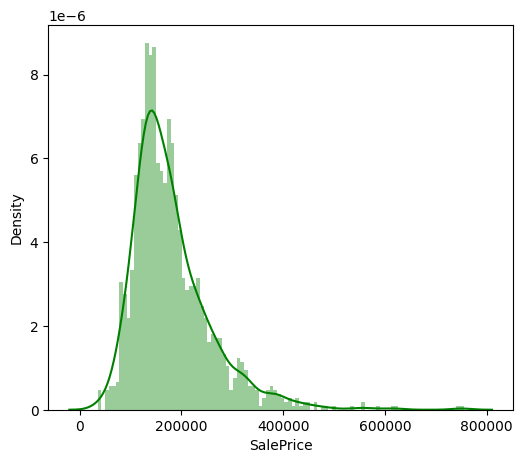

In [11]:
plt.figure(figsize=(6, 5))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

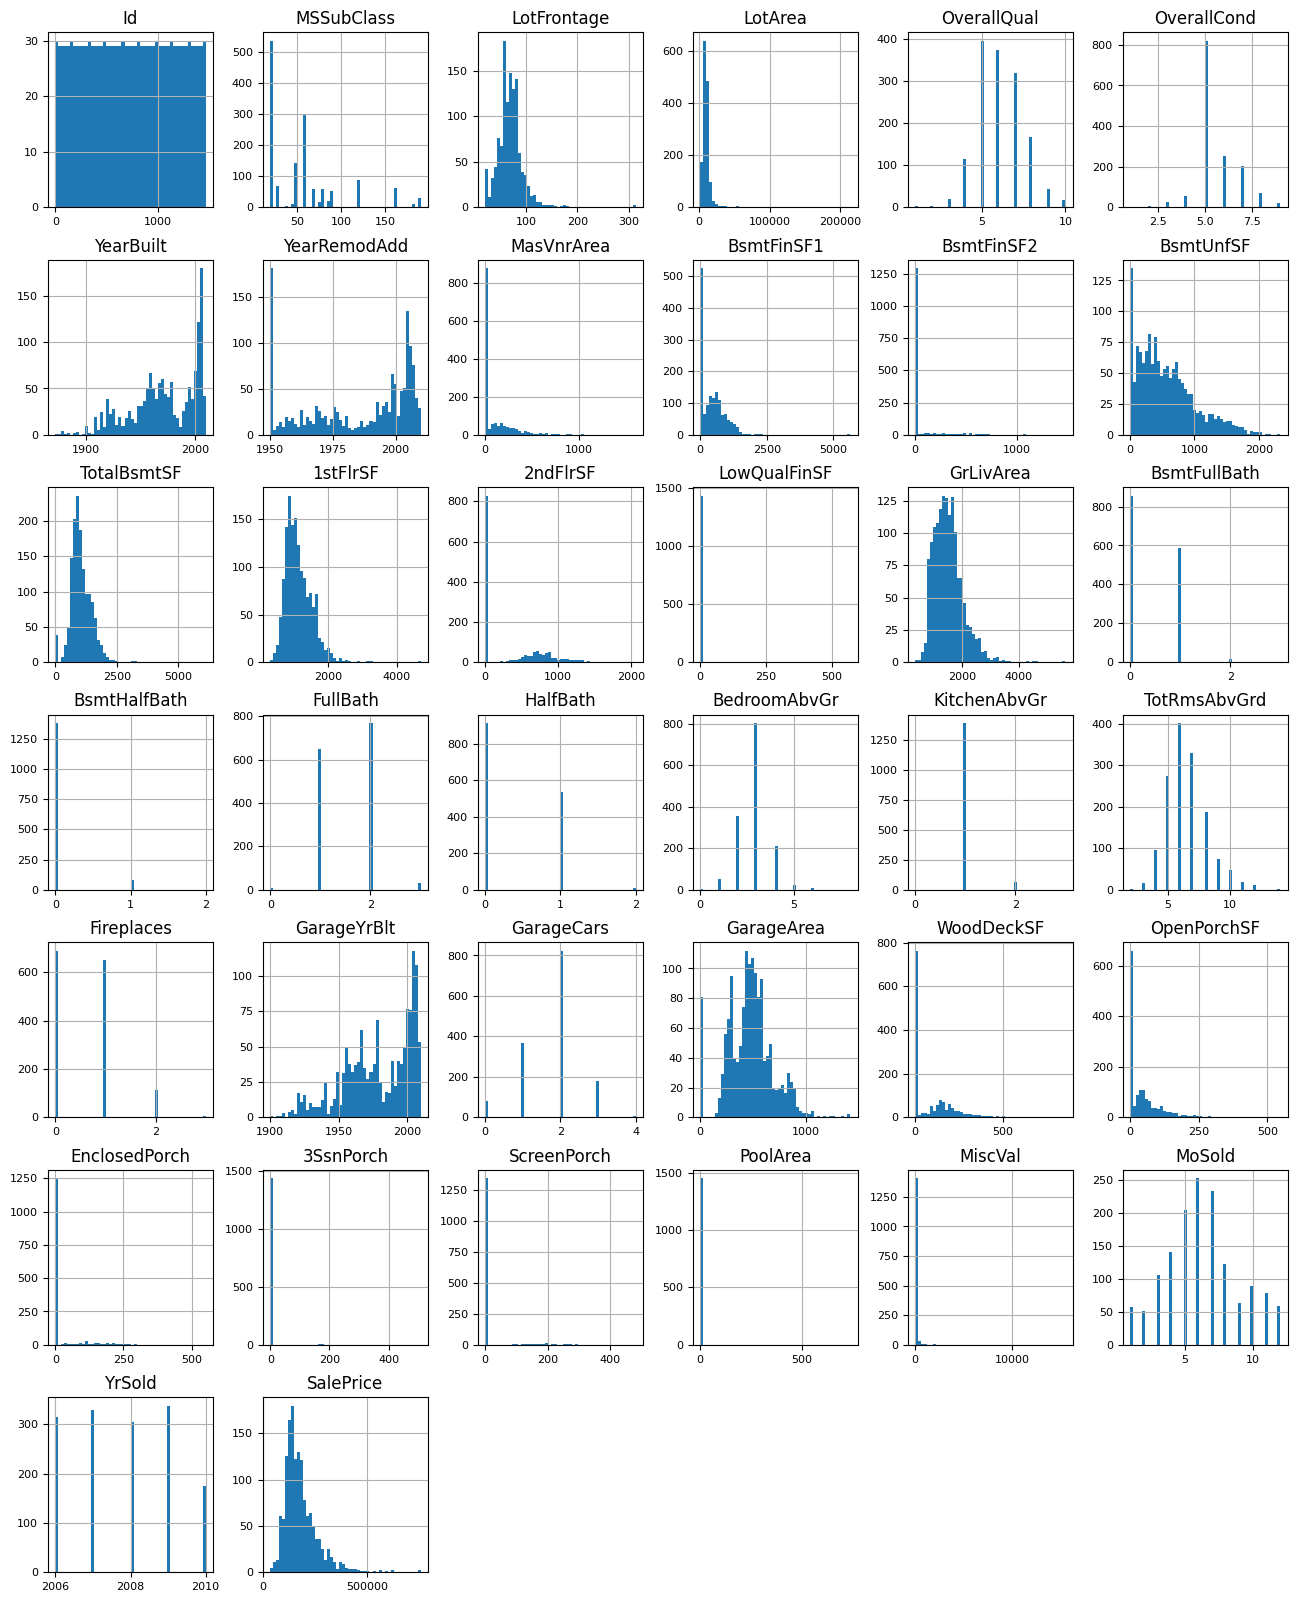

In [12]:
df_num = data.select_dtypes(include=['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# Missing Data

In [13]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

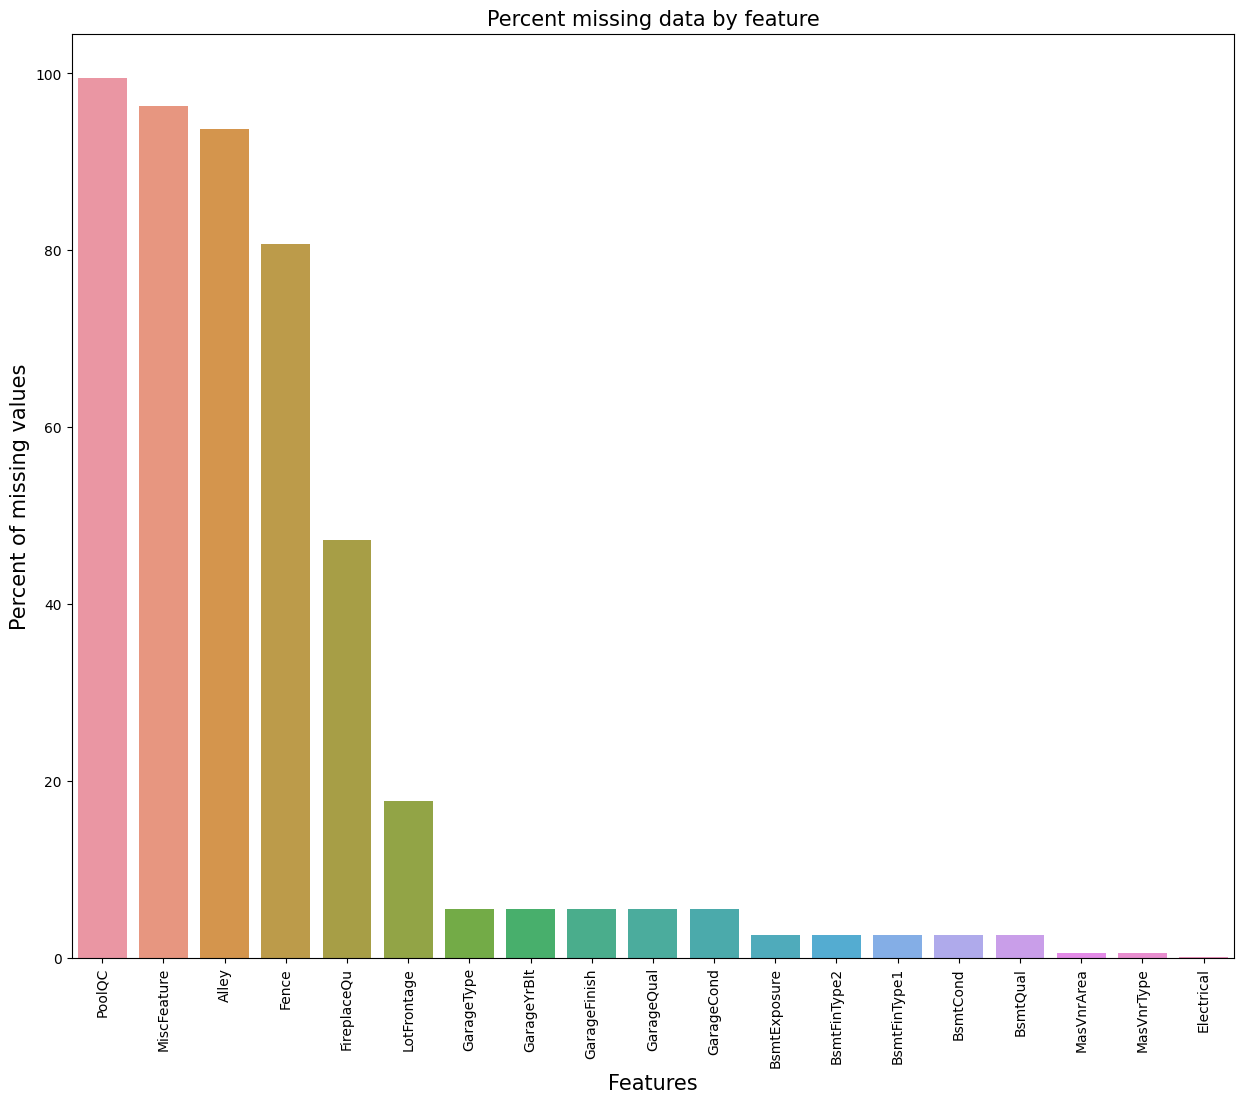

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [15]:
numeric_columns = data.select_dtypes(include=['number'])

<Axes: >

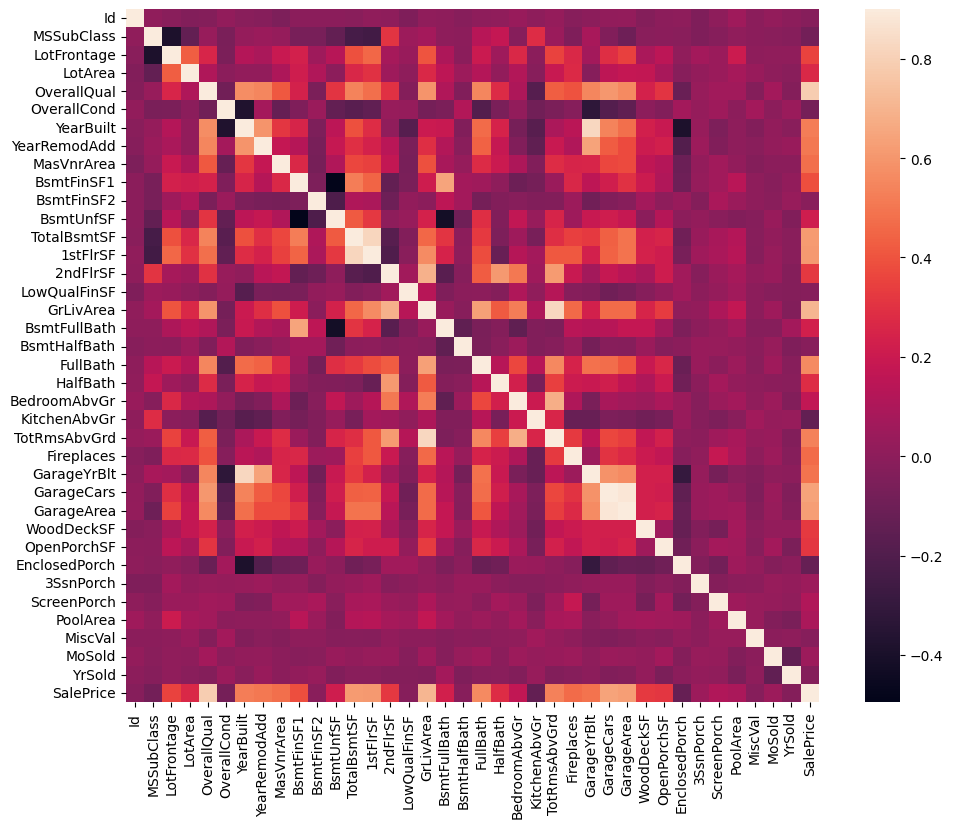

In [16]:
corrmat = numeric_columns.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Useful function

In [17]:
def create_scatterplot(true, predicted):
    plt.figure(figsize=(8, 5))

    plt.scatter(true, predicted,c=np.abs(true - predicted), cmap='viridis', alpha=0.6)
    plt.plot(true, true, color="red")

    plt.colorbar(label='Difference')

    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Scatter plot')
    plt.show()


In [18]:
def create_residual_plot(y_true, y_pred):
    residuals = y_true - y_pred

    plt.scatter(y_pred, residuals, c=np.abs(residuals), cmap='coolwarm', alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.colorbar(label='Absolute Residual')
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.title('Residual plot')

    plt.show()

In [19]:
def metrics(model, X, y, data_type, squ, abso, r2s, k=5):

    y_pred = cross_val_predict(model, X, y, cv=k)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print("Mean_squared_error: ", mse)
    print("Mean_absolute_error: ", mae)
    print("r2_score: ", r2)

    squ[data_type] = mse
    abso[data_type] = mae
    r2s[data_type] = r2

In [20]:
def find_best_params(model, X, y, params):
    grid = GridSearchCV(model, param_grid=params, cv=3)
    grid.fit(X, y)

    best_params = grid.best_params_
    print(best_params)
    return best_params

# Label Encoding

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
encoded = data.copy()

In [23]:
for column in encoded.select_dtypes(include=['object']):
    encoded[column] = le.fit_transform(encoded[column])

In [24]:
encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [25]:
y_row = encoded['SalePrice']
X_row = encoded.drop('SalePrice', axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train_row, X_test_row, y_train_row, y_test_row = train_test_split(X_row, y_row, test_size=0.33, random_state=42)

# Gradient Boosted Decision Trees

In [27]:
squared_dict = {}
absolute_dict = {}
r2score_dict = {}

In [28]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_row, y_train_row)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
y_pred = xgb_model.predict(X_test_row)

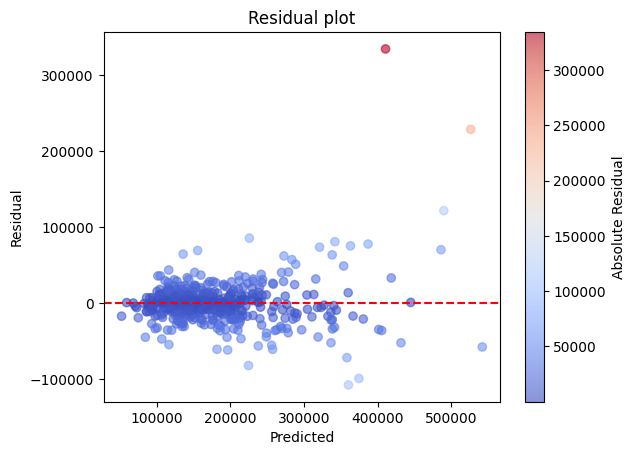

In [30]:
create_residual_plot(y_test_row, y_pred)

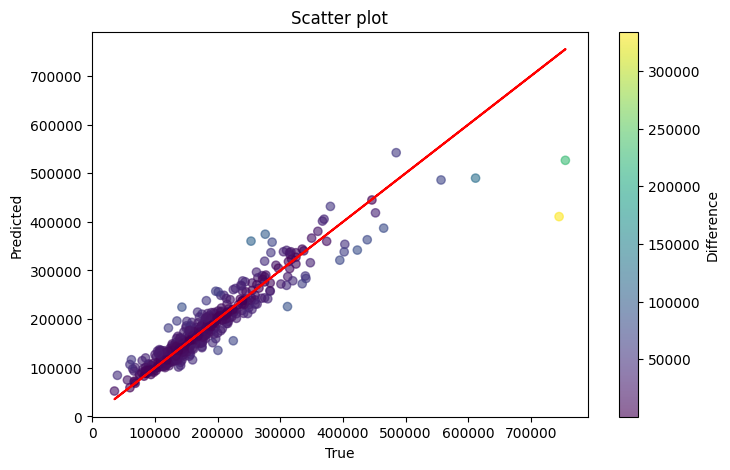

In [31]:
create_scatterplot(y_test_row, y_pred)

In [32]:
metrics(xgb_model, X_test_row, y_test_row, 'row_data', squared_dict, absolute_dict, r2score_dict)

Mean_squared_error:  1143462086.7497354
Mean_absolute_error:  20824.2742155083
r2_score:  0.8442444993618468


In [33]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 1]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error')
grid_search.fit(X_train_row, y_train_row)
best_params = grid_search.best_params_


In [34]:
xgb_model_best = xgb.XGBRegressor(**best_params)
xgb_model_best.fit(X_train_row, y_train_row)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
y_pred_b = xgb_model_best.predict(X_test_row)

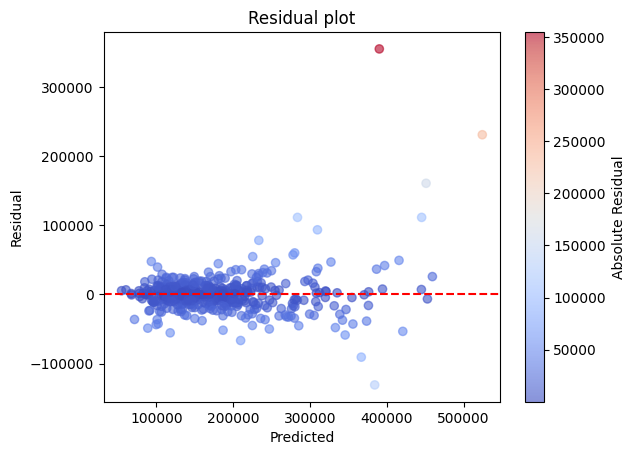

In [36]:
create_residual_plot(y_test_row, y_pred_b)

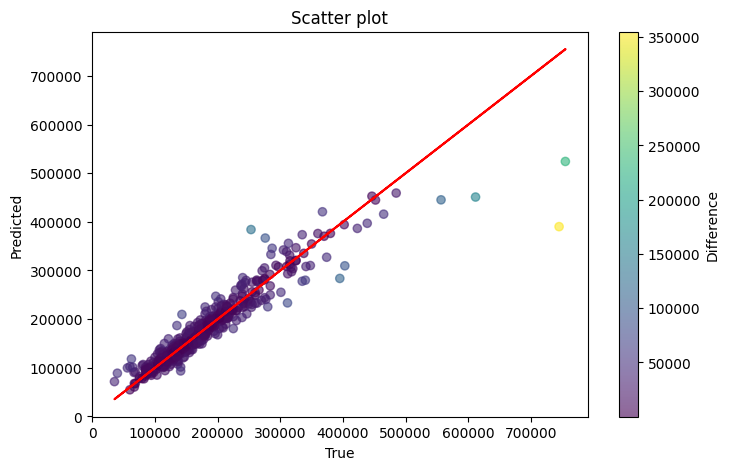

In [37]:
create_scatterplot(y_test_row, y_pred_b)

In [38]:
metrics(xgb_model_best, X_test_row, y_test_row, 'row_data_best_params', squared_dict, absolute_dict, r2score_dict)

Mean_squared_error:  755628844.6578612
Mean_absolute_error:  17666.068197289937
r2_score:  0.8970728016607397


# Light Gradient Boosting

In [39]:
import lightgbm as lgb

In [40]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_row, y_train_row)

LGBMRegressor()

In [41]:
squared_dict_lgb = {}
absolute_dict_lgb = {}
r2score_dict_lgb = {}

In [42]:
y_pred = lgb_model.predict(X_test_row)

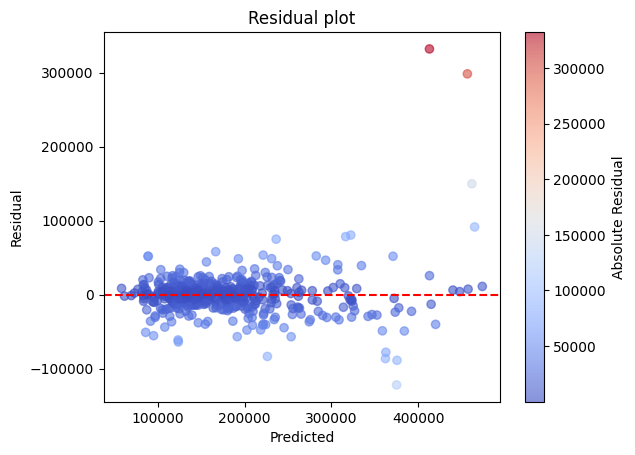

In [43]:
create_residual_plot(y_test_row, y_pred)

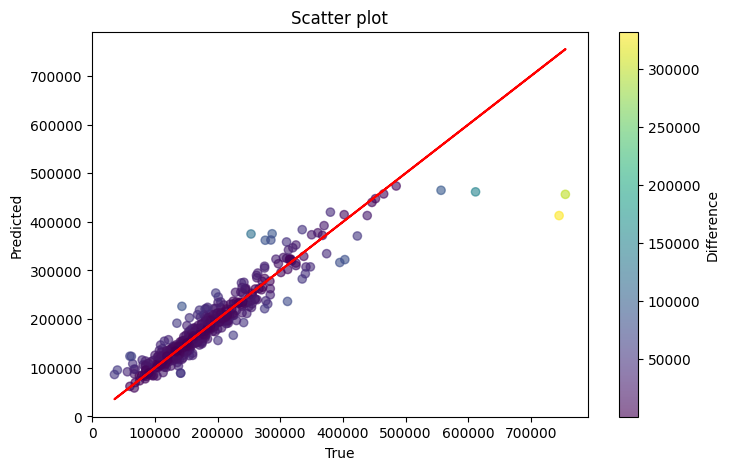

In [44]:
create_scatterplot(y_test_row, y_pred)

In [45]:
metrics(lgb_model, X_test_row, y_test_row, 'row_data', squared_dict_lgb, absolute_dict_lgb, r2score_dict_lgb)

Mean_squared_error:  993582123.8258935
Mean_absolute_error:  18978.486021002213
r2_score:  0.8646602428581505


In [46]:
lgb_model = lgb.LGBMRegressor()

param_options = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_options, scoring='neg_mean_squared_error')
grid_search.fit(X_train_row, y_train_row)
best_params = grid_search.best_params_

In [47]:
lgb_model_best = lgb.LGBMClassifier(**best_params)
lgb_model_best.fit(X_train_row, y_train_row)

LGBMClassifier(colsample_bytree=0.9, max_depth=5, n_estimators=200,
               subsample=0.8)

In [48]:
y_pred_b = lgb_model_best.predict(X_test_row)

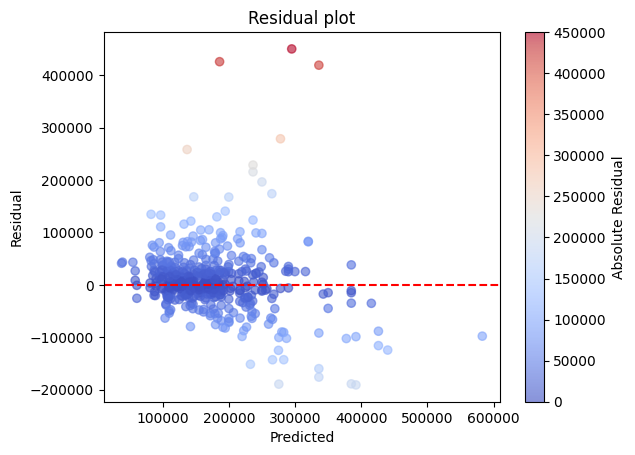

In [49]:
create_residual_plot(y_test_row, y_pred_b)

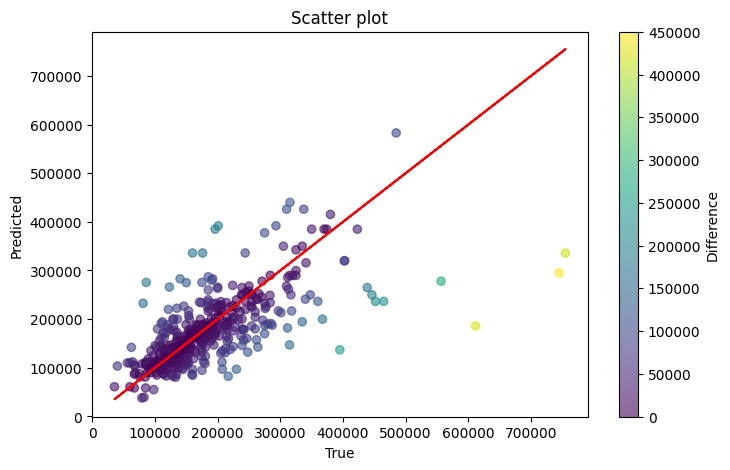

In [50]:
create_scatterplot(y_test_row, y_pred_b)

In [51]:
metrics(lgb_model, X_test_row, y_test_row, 'row_data_best_params', squared_dict_lgb, absolute_dict_lgb, r2score_dict_lgb)

Mean_squared_error:  993582123.8258935
Mean_absolute_error:  18978.486021002213
r2_score:  0.8646602428581505


In our raw data, we have many columns that contain null values. Due to this, we cannot use Random Forest without removing or processing those null values.

# Handle missing values

We calculate the feature importance using the "mutual information scores" method. This method allows us to assess how much each feature contributes to predicting the target variable. Then, we remove the features with the least significance.

We calculate the percentage of missing values in each column and then remove those columns for which the percentage is greater than 80%. Then, for the remaining columns, we fill the missing values with the mean for numerical columns and the mode (most frequent value) for nominal columns.

In [52]:
percent_missing = np.mean(data.isnull(), axis=0)
empty_columns = data.columns[percent_missing > 0.8]
print(empty_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [53]:
data = data.drop(empty_columns, axis=1)

In [54]:
data = data.drop('Id', axis=1)

In [55]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [56]:
nonnum_cols = data.select_dtypes(exclude=np.number).columns
data[nonnum_cols] = data[nonnum_cols].fillna(data[nonnum_cols].mode().iloc[0])

In [57]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [58]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [59]:
y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)

In [60]:
for column in X.select_dtypes(include=['object']):
    X[column] = le.fit_transform(X[column])

In [61]:
from sklearn.model_selection import train_test_split
X_train_row, X_test_row, y_train_row, y_test_row = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
X_train_row.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
615,85,3,80.0,8800,1,3,3,0,4,0,...,0,0,0,0,0,0,5,2010,8,0
613,20,3,70.0,8402,1,3,3,0,4,0,...,30,0,0,0,0,0,12,2007,6,5
1303,20,3,73.0,8688,1,3,3,0,4,0,...,59,0,0,0,0,0,4,2006,8,4
486,20,3,79.0,10289,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2007,8,4
561,20,3,77.0,10010,1,3,3,0,4,1,...,38,0,0,0,0,0,4,2006,8,4


# Random Forest

In [63]:
squared_dict_rf = {}
absolute_dict_rf = {}
r2score_dict_rf = {}

In [64]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train_row, y_train_row)

RandomForestRegressor()

In [65]:
y_pred = clf.predict(X_test_row)

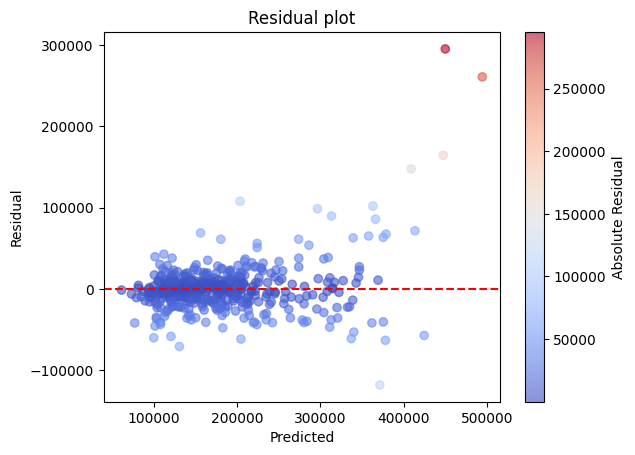

In [66]:
create_residual_plot(y_test_row, y_pred)

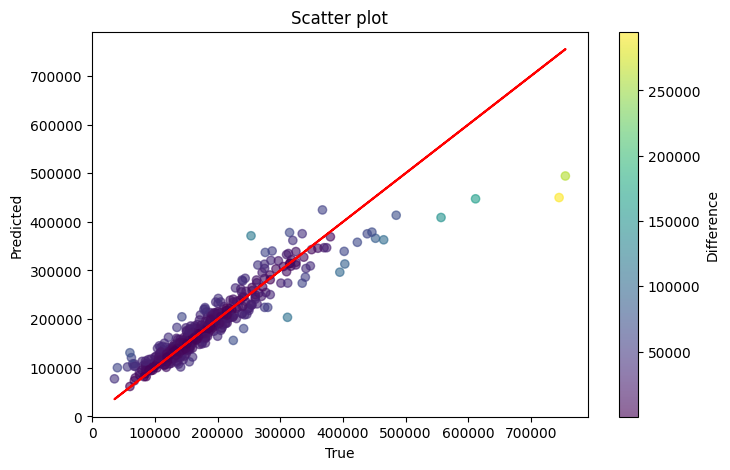

In [67]:
create_scatterplot(y_test_row, y_pred)

In [68]:
metrics(clf, X_test_row, y_test_row, 'row_data', squared_dict_rf, absolute_dict_rf, r2score_dict_rf)

Mean_squared_error:  1115905196.7648304
Mean_absolute_error:  20459.71302904564
r2_score:  0.847998132512754


In [69]:
clf = RandomForestRegressor()

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=clf, param_grid=params_rf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_row, y_train_row)
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [70]:
rf_model_best = RandomForestRegressor(**best_params)
rf_model_best.fit(X_train_row, y_train_row)

RandomForestRegressor(max_features='sqrt', min_samples_split=6)

In [71]:
y_pred_b = rf_model_best.predict(X_test_row)

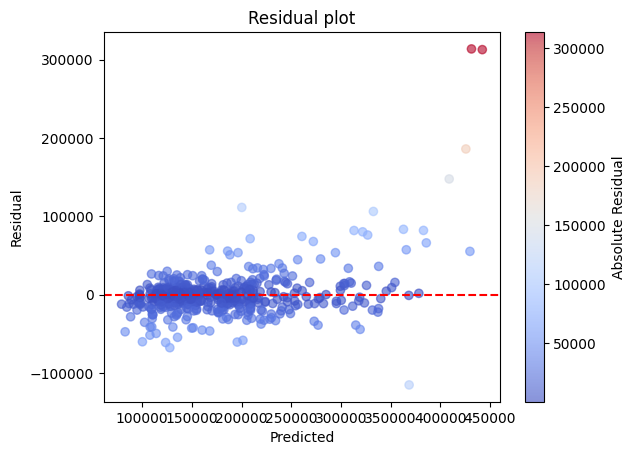

In [72]:
create_residual_plot(y_test_row, y_pred_b)

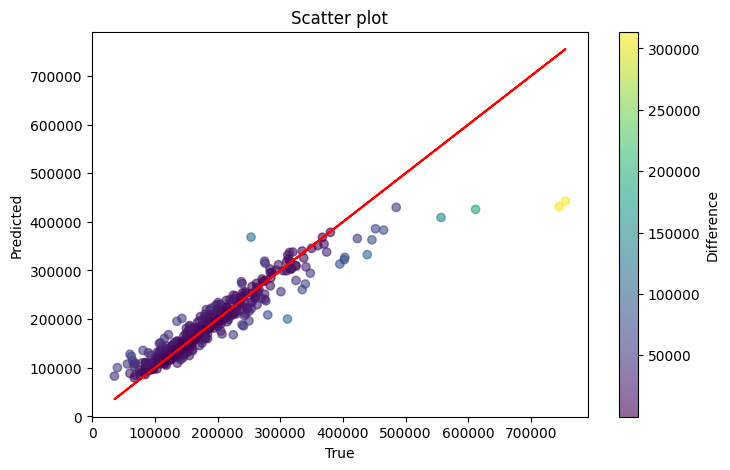

In [73]:
create_scatterplot(y_test_row, y_pred_b)

In [74]:
metrics(clf, X_test_row, y_test_row, 'row_data_best_params', squared_dict_rf, absolute_dict_rf, r2score_dict_rf)

Mean_squared_error:  1128966040.017053
Mean_absolute_error:  20667.21487551867
r2_score:  0.8462190633131019


# Feature importance graph

We calculate the contribution of each feature to the classification by dividing the ANOVA scores by the sum of all scores and multiplying by 100. This way, we obtain the percentage contribution of each feature to the classification.

As a result, we obtain a feature_contribution vector that contains the percentage contribution of each feature to the classification, where a higher value indicates a greater contribution of that feature to predicting the classification outcomes.

After obtaining the results, we select only the features with the highest significance and remove those whose percentage contribution is less than 0.01%.

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X, y)

feature_contribution = (fs.scores_ / sum(fs.scores_)) * 100

MSSubClass : 0.75%
MSZoning : 1.50%
LotFrontage : 1.05%
LotArea : 2.84%
Street : 1.62%
LotShape : 1.21%
LandContour : 0.93%
Utilities : 0.21%
LotConfig : 0.83%
LandSlope : 1.03%
Neighborhood : 1.08%
Condition1 : 0.67%
Condition2 : 1.33%
BldgType : 0.88%
HouseStyle : 0.90%
OverallQual : 4.95%
OverallCond : 0.95%
YearBuilt : 1.99%
YearRemodAdd : 1.58%
RoofStyle : 1.01%
RoofMatl : 0.92%
Exterior1st : 0.85%
Exterior2nd : 0.88%
MasVnrType : 1.11%
MasVnrArea : 1.72%
ExterQual : 3.26%
ExterCond : 0.75%
Foundation : 1.29%
BsmtQual : 2.60%
BsmtCond : 0.86%
BsmtExposure : 1.19%
BsmtFinType1 : 0.85%
BsmtFinSF1 : 1.46%
BsmtFinType2 : 0.74%
BsmtFinSF2 : 0.86%
BsmtUnfSF : 1.26%
TotalBsmtSF : 2.00%
Heating : 1.28%
HeatingQC : 1.11%
CentralAir : 1.36%
Electrical : 0.99%
1stFlrSF : 2.02%
2ndFlrSF : 1.44%
LowQualFinSF : 0.74%
GrLivArea : 2.97%
BsmtFullBath : 0.98%
BsmtHalfBath : 0.73%
FullBath : 2.31%
HalfBath : 1.22%
BedroomAbvGr : 1.07%
KitchenAbvGr : 0.76%
KitchenQual : 2.51%
TotRmsAbvGrd : 1.62%
Fun

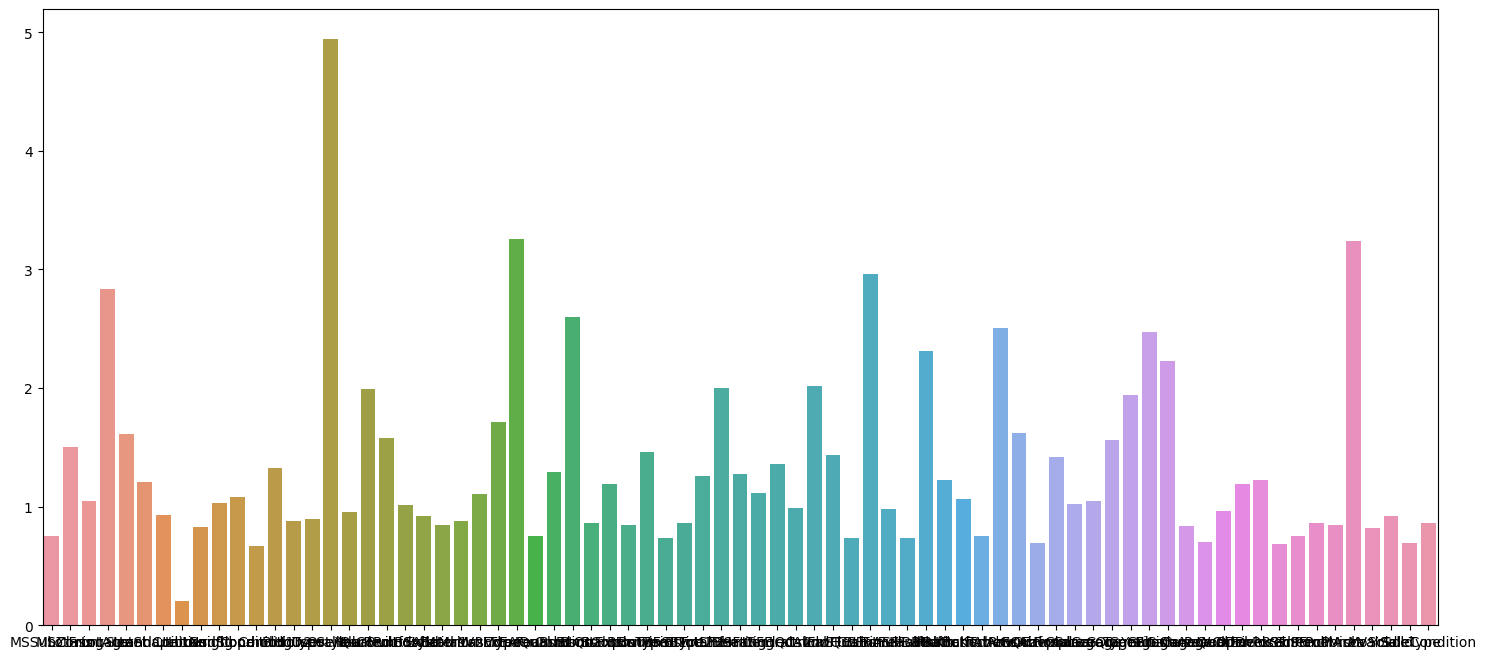

In [76]:
for i, j in enumerate(X.columns):
    print(f"{j} : {feature_contribution[i]:.2f}%")

plt.figure(figsize=(18, 8))
sns.barplot(x=X.columns, y=feature_contribution)
plt.show()

In [77]:
X = X.loc[:, feature_contribution > 1]

In [78]:
X

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandSlope,Neighborhood,Condition2,OverallQual,YearBuilt,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal
0,3,65.0,8450,1,3,0,5,2,7,2003,...,0,2,1,2003.0,1,2,548,0,61,0
1,3,80.0,9600,1,3,0,24,2,6,1976,...,1,4,1,1976.0,1,2,460,298,0,0
2,3,68.0,11250,1,0,0,5,2,7,2001,...,1,4,1,2001.0,1,2,608,0,42,0
3,3,60.0,9550,1,0,0,6,2,7,1915,...,1,2,5,1998.0,2,3,642,0,35,0
4,3,84.0,14260,1,0,0,15,2,8,2000,...,1,4,1,2000.0,1,3,836,192,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,62.0,7917,1,3,0,8,2,6,1999,...,1,4,1,1999.0,1,2,460,0,40,0
1456,3,85.0,13175,1,3,0,14,2,6,1978,...,2,4,1,1978.0,2,2,500,349,0,0
1457,3,66.0,9042,1,3,0,6,2,7,1941,...,2,2,1,1941.0,1,1,252,0,60,2500
1458,3,68.0,9717,1,3,0,12,2,5,1950,...,0,2,1,1950.0,2,1,240,366,0,0


# Removing irrelevant features

In [79]:
def find_most_correlated_columns(data):
    corr_matrix = data.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    max_corr = corr_matrix.max()
    max_corr_columns = max_corr[max_corr == max_corr.max()].index.tolist()
    return max_corr_columns

most_correlated_columns = find_most_correlated_columns(X)
X = X.drop(most_correlated_columns, axis=1)
print("The most correlated columns:", most_correlated_columns)

The most correlated columns: ['GarageCars', 'GarageArea']


# Standardization of data

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use PCA

In [81]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=30)
# X_pca = pca.fit_transform(X)

In [82]:
# X_pca

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Gradient Boosted Decision Trees - prepared data

In [84]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
y_pred = xgb_model.predict(X_test)

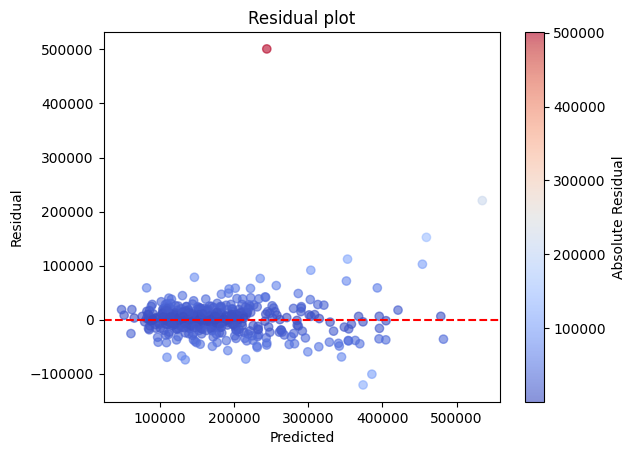

In [86]:
create_residual_plot(y_test, y_pred)

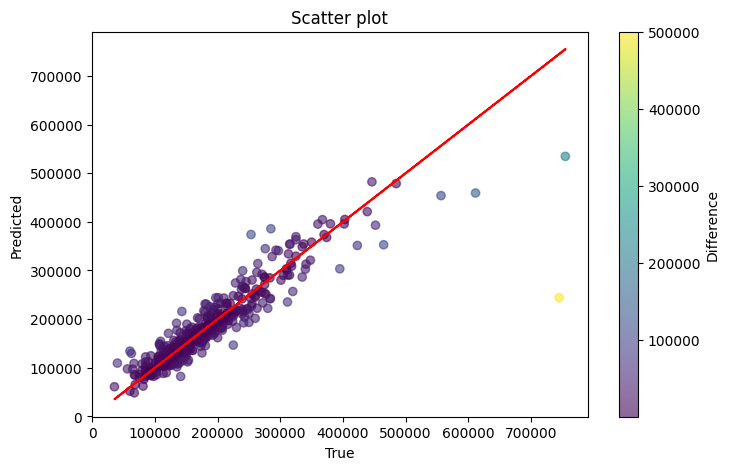

In [87]:
create_scatterplot(y_test, y_pred)

In [88]:
metrics(xgb_model, X_test, y_test, 'prepared_data', squared_dict, absolute_dict, r2score_dict)

Mean_squared_error:  1225627168.517502
Mean_absolute_error:  21451.067702930497
r2_score:  0.8330524680789466


In [89]:
xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error')
grid_search.fit(X_train_row, y_train_row)
best_params = grid_search.best_params_

In [90]:
xgb_model_best = xgb.XGBRegressor(**best_params)
xgb_model_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
y_pred_b = xgb_model_best.predict(X_test)

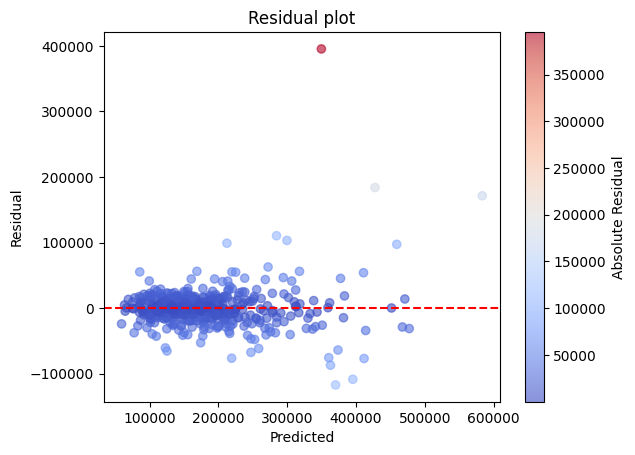

In [92]:
create_residual_plot(y_test, y_pred_b)

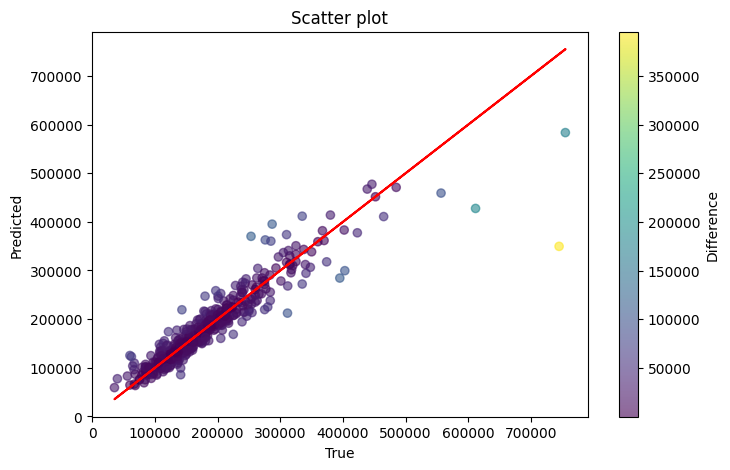

In [93]:
create_scatterplot(y_test, y_pred_b)

In [94]:
metrics(xgb_model_best, X_test, y_test, 'prepared_data_best_params', squared_dict, absolute_dict, r2score_dict)

Mean_squared_error:  735704271.2199845
Mean_absolute_error:  17843.519142245852
r2_score:  0.8997868067395083


# Random Forest - prepared data

In [95]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
y_pred = rf_model.predict(X_test)

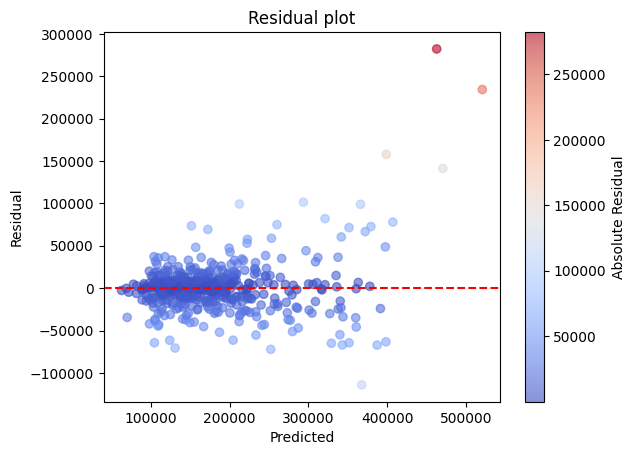

In [97]:
create_residual_plot(y_test, y_pred)

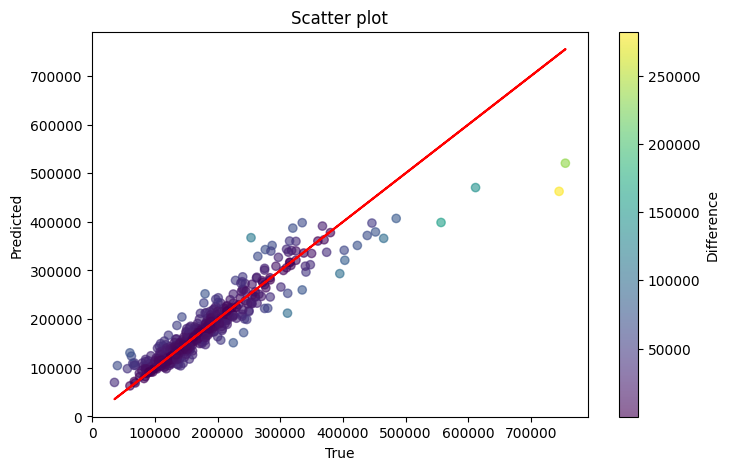

In [98]:
create_scatterplot(y_test, y_pred)

In [99]:
metrics(clf, X_test, y_test, 'prepared_data', squared_dict_rf, absolute_dict_rf, r2score_dict_rf)

Mean_squared_error:  1159025692.0319047
Mean_absolute_error:  21138.51917012448
r2_score:  0.8421245190314544


In [100]:
rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=clf, param_grid=params_rf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [101]:
rf_model_best = RandomForestRegressor(**best_params)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=6)

In [102]:
y_pred_b = rf_model_best.predict(X_test)

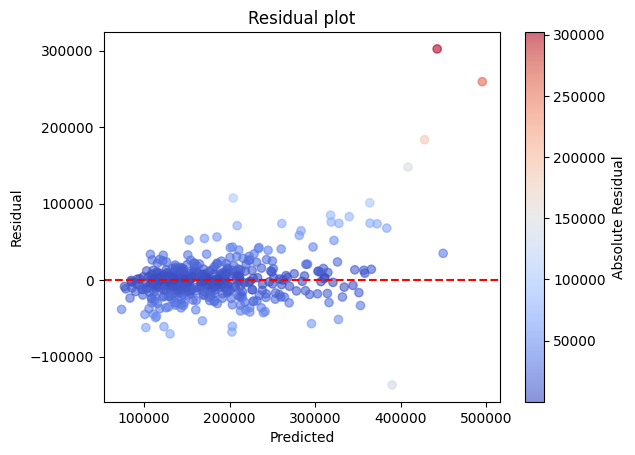

In [103]:
create_residual_plot(y_test, y_pred_b)

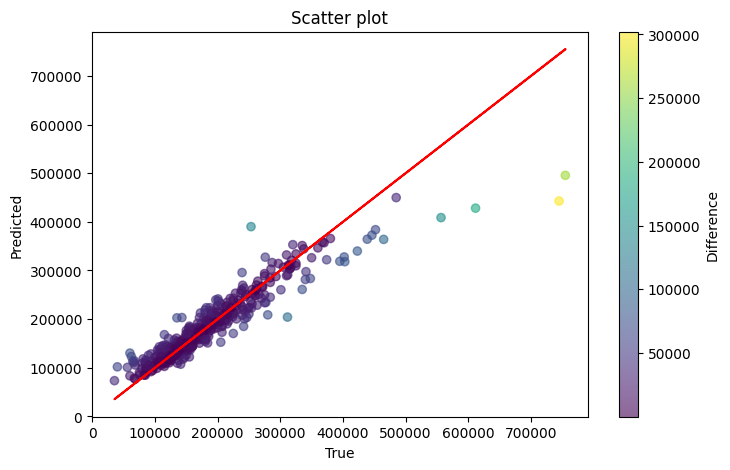

In [104]:
create_scatterplot(y_test, y_pred_b)

In [105]:
metrics(clf, X_test, y_test, 'prepared_data_best_params', squared_dict_rf, absolute_dict_rf, r2score_dict_rf)

Mean_squared_error:  1161210688.4886277
Mean_absolute_error:  20889.837925311203
r2_score:  0.8418268920082648


# Light Gradient Boosting - prepared data

In [106]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [107]:
y_pred = lgb_model.predict(X_test)

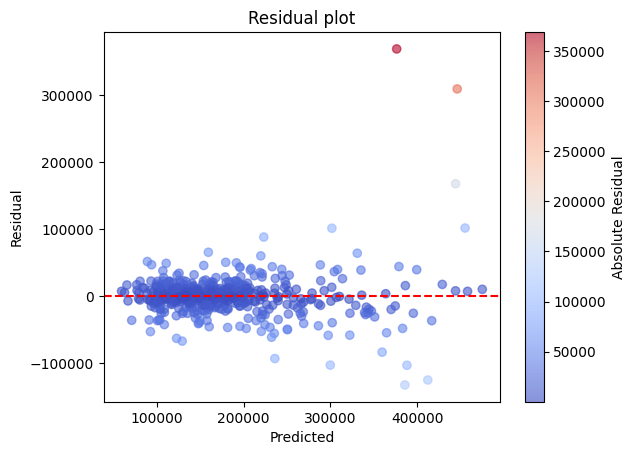

In [108]:
create_residual_plot(y_test, y_pred)

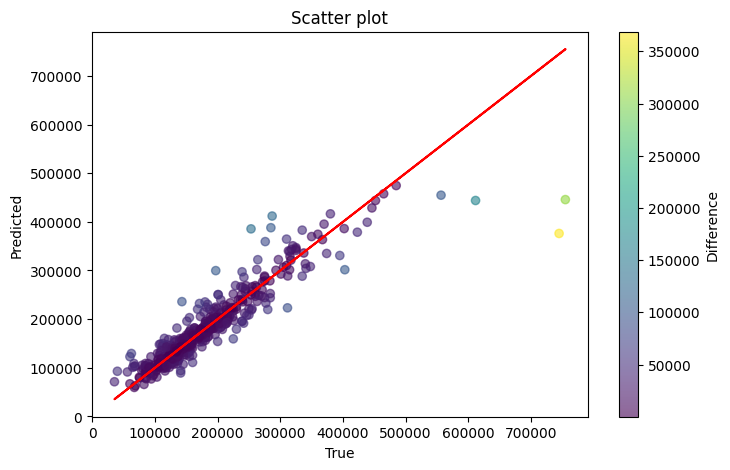

In [109]:
create_scatterplot(y_test, y_pred)

In [110]:
metrics(lgb_model, X_test, y_test, 'prepared_data', squared_dict_lgb, absolute_dict_lgb, r2score_dict_lgb)

Mean_squared_error:  1058928153.869404
Mean_absolute_error:  19452.388980617478
r2_score:  0.8557592012389452


In [111]:
lgb_model = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_options, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [112]:
lgb_model_best = lgb.LGBMRegressor(**best_params)
lgb_model_best.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.9, max_depth=5, n_estimators=200,
              subsample=0.8)

In [113]:
y_pred_b = lgb_model_best.predict(X_test)

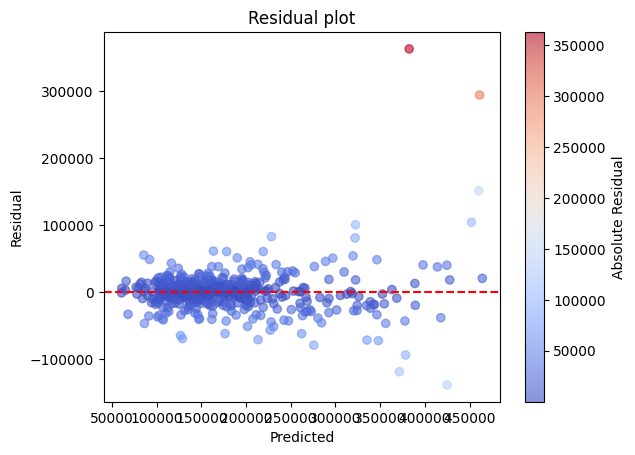

In [114]:
create_residual_plot(y_test, y_pred_b)

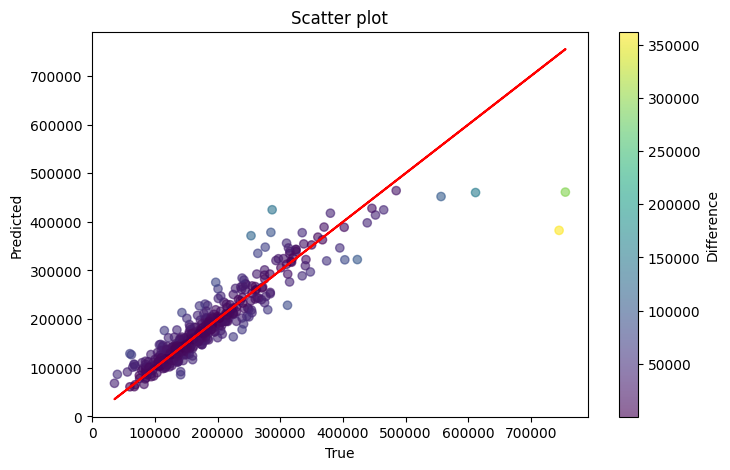

In [115]:
create_scatterplot(y_test, y_pred_b)

In [116]:
metrics(lgb_model, X_test, y_test, 'prepared_data_best_params', squared_dict_lgb, absolute_dict_lgb, r2score_dict_lgb)

Mean_squared_error:  1058928153.869404
Mean_absolute_error:  19452.388980617478
r2_score:  0.8557592012389452


# Visualization

# Gradient Boosted Decision Trees - metrics

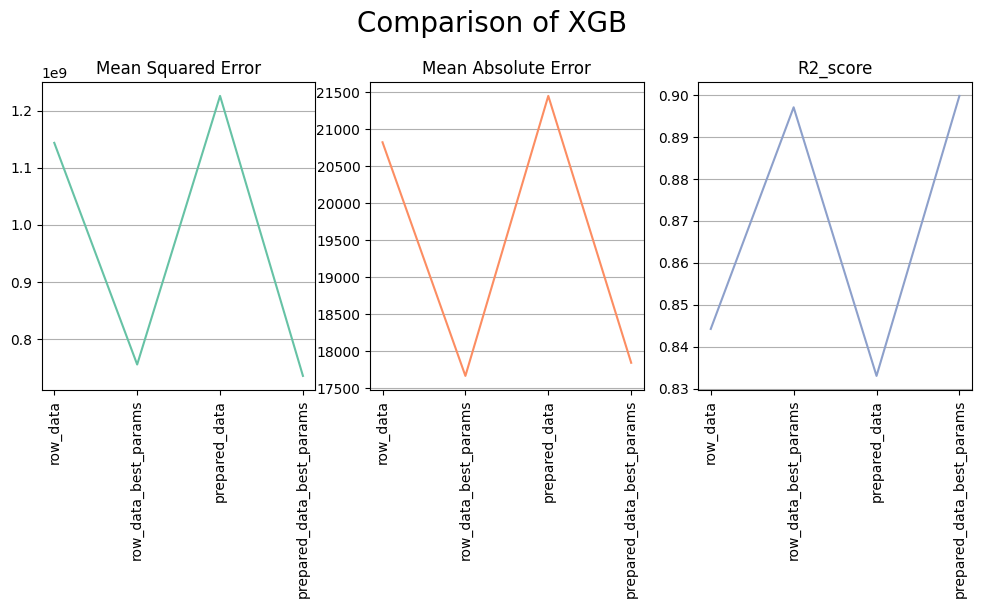

In [117]:
colors = sns.color_palette('Set2')


fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Comparison of XGB', fontsize=20, y=1.06)


sns.lineplot(x = squared_dict.keys(), y = squared_dict.values(), ax=axs[0],color=colors[0])
axs[0].set_title('Mean Squared Error')
axs[0].xaxis.set_tick_params(rotation=90)
axs[0].yaxis.grid(True)


sns.lineplot(x = absolute_dict.keys(), y = absolute_dict.values(), ax=axs[1],color=colors[1])
axs[1].set_title('Mean Absolute Error')
axs[1].xaxis.set_tick_params(rotation=90)
axs[1].yaxis.grid(True)


sns.lineplot(x = r2score_dict.keys(), y = r2score_dict.values(), ax=axs[2],color=colors[2])
axs[2].set_title('R2_score')
axs[2].xaxis.set_tick_params(rotation=90)
axs[2].yaxis.grid(True)


# Light Gradient Boosting - metrics

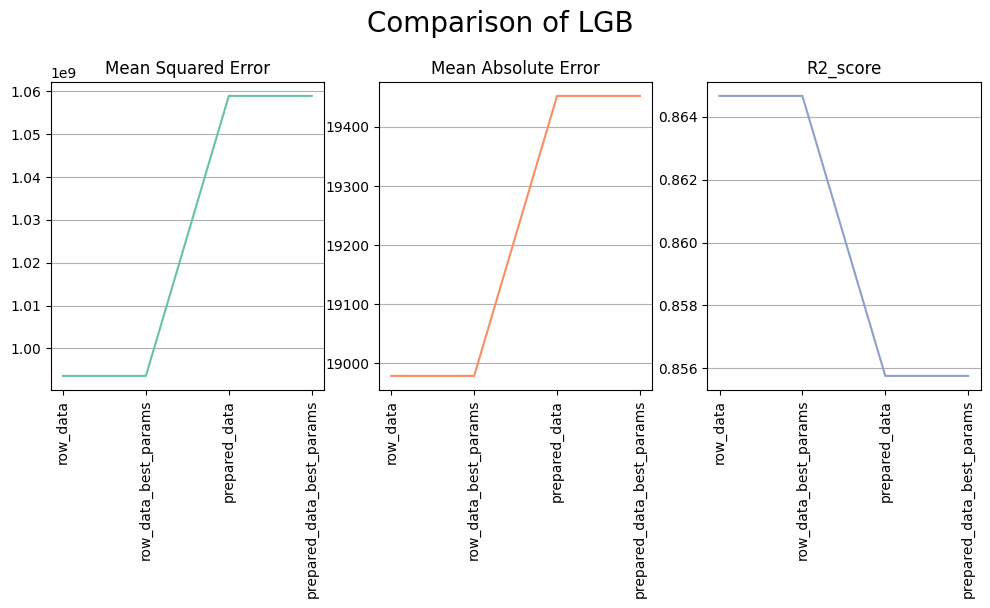

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Comparison of LGB', fontsize=20, y=1.06)


sns.lineplot(x = squared_dict_lgb.keys(), y = squared_dict_lgb.values(), ax=axs[0],color=colors[0])
axs[0].set_title('Mean Squared Error')
axs[0].xaxis.set_tick_params(rotation=90)
axs[0].yaxis.grid(True)


sns.lineplot(x = absolute_dict_lgb.keys(), y = absolute_dict_lgb.values(), ax=axs[1],color=colors[1])
axs[1].set_title('Mean Absolute Error')
axs[1].xaxis.set_tick_params(rotation=90)
axs[1].yaxis.grid(True)


sns.lineplot(x = r2score_dict_lgb.keys(), y = r2score_dict_lgb.values(), ax=axs[2],color=colors[2])
axs[2].set_title('R2_score')
axs[2].xaxis.set_tick_params(rotation=90)
axs[2].yaxis.grid(True)


# Random Forest - metrics

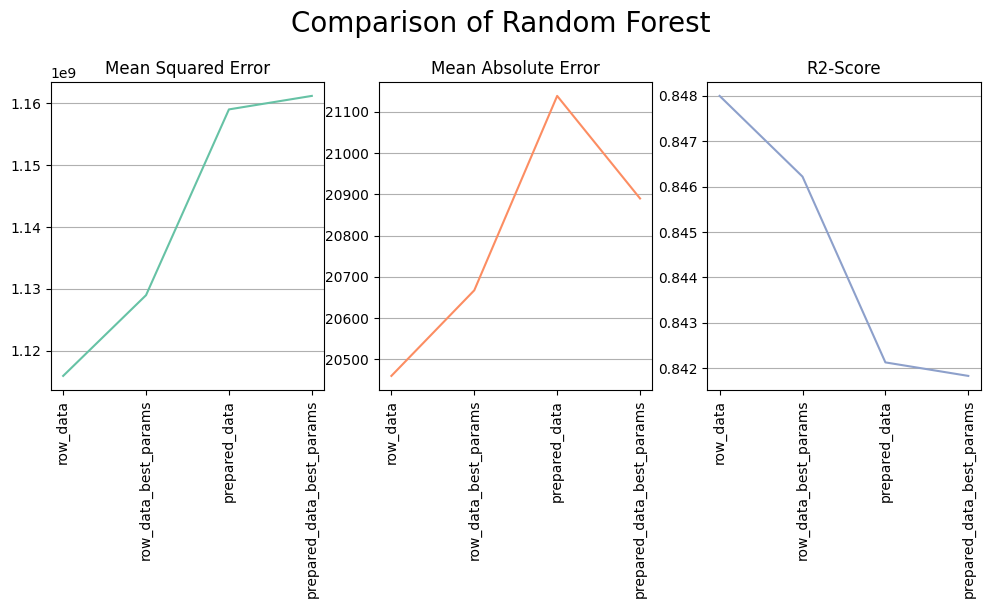

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Comparison of Random Forest', fontsize=20, y=1.06)


sns.lineplot(x = squared_dict_rf.keys(), y = squared_dict_rf.values(), ax=axs[0], color=colors[0])
axs[0].set_title('Mean Squared Error')
axs[0].xaxis.set_tick_params(rotation=90)
axs[0].yaxis.grid(True)


sns.lineplot(x = absolute_dict_rf.keys(), y = absolute_dict_rf.values(), ax=axs[1], color=colors[1])
axs[1].set_title('Mean Absolute Error')
axs[1].xaxis.set_tick_params(rotation=90)
axs[1].yaxis.grid(True)

sns.lineplot(x = r2score_dict_rf.keys(), y = r2score_dict_rf.values(), ax=axs[2], color=colors[2])
axs[2].set_title('R2-Score')
axs[2].xaxis.set_tick_params(rotation=90)
axs[2].yaxis.grid(True)


